In [7]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [2]:
audio_dataset_path= r"C:\Users\Karan\Downloads\UrbanSound8K\audio"

In [4]:
audio_file_path  = r"99812-1-0-2.wav"
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [5]:
# Sample Check
print(librosa_audio_data)

[0.0020373  0.00185959 0.00170394 ... 0.00109415 0.00057423 0.0030348 ]


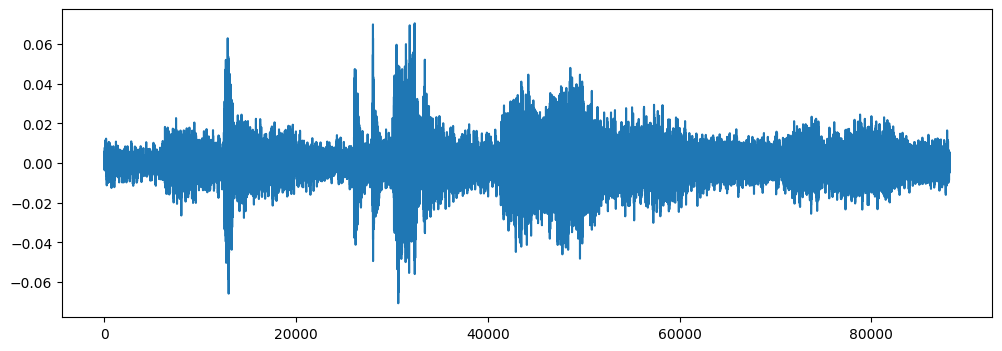

In [8]:
# Visual representation of uudio wave
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [9]:
# Sample Check on MFCC's(mel frequency cepstral coefficients) extraction
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=80)
print(mfccs.shape)

(80, 173)


In [11]:
mfccs

array([[-4.2115170e+02, -3.9253745e+02, -3.9632980e+02, ...,
        -3.7715735e+02, -3.7962943e+02, -3.9837561e+02],
       [ 1.1999135e+02,  1.1867348e+02,  1.1877958e+02, ...,
         8.6070831e+01,  9.1000473e+01,  8.8062271e+01],
       [-4.8796272e+01, -4.8602665e+01, -4.2431839e+01, ...,
        -4.2903721e+01, -4.0126511e+01, -3.4025902e+01],
       ...,
       [ 5.5057907e-01,  1.3119308e+00, -2.6469541e+00, ...,
         8.8168812e-01, -6.7714977e-01,  1.2401642e+00],
       [-9.1832763e-01,  6.1704004e-01,  6.2089670e-01, ...,
         1.2176533e+00,  1.0725591e+00,  1.7715535e+00],
       [-1.2618580e+00,  2.8721333e-02,  2.5161142e+00, ...,
         2.9227290e+00,  3.3878632e+00,  3.1309183e+00]], dtype=float32)

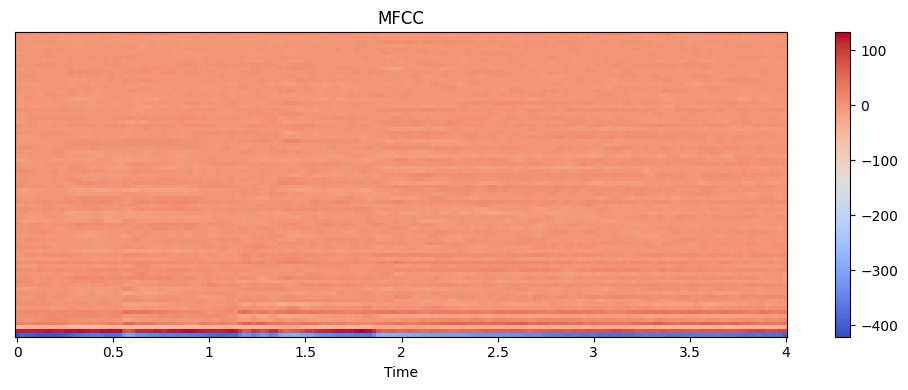

In [12]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=librosa_sample_rate)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [3]:
#Reading Metadata of Audio Files
metadata=pd.read_csv(r"UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
#Function to extract MFCC's of all Audio Waves in Dataset
def features_extractor(file):
    audio, sample_rate = librosa.load(file) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=80)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [5]:
#Extraction of MFCC's of all Audio Waves
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3551it [00:55, 62.03it/s]c:\Users\Karan\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8322it [02:05, 72.98it/s] c:\Users\Karan\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
c:\Users\Karan\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [02:11, 66.38it/s]


In [7]:
#converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()
# Split the Features column into separate columns
extracted_features_df = pd.concat([extracted_features_df.drop(['feature'], axis=1), extracted_features_df['feature'].apply(pd.Series)], axis=1)

In [ ]:
# Write DataFrame to CSV file
extracted_features_df.to_csv('MFCCs.csv', index=False)